In [1]:
from selenium import webdriver
#from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from time import sleep
import pandas as pd
import re
import datetime
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
#options.add_argument("window-size=1400,600")
#options.add_argument('--disable-gpu')  # Last I checked this was necessary.
#page= driver.execute_script("return document.body.innerHTML")

#____________________________________________________________________________________
def rL(pL):
    #full time resultss
    
    k1=pL[0]+pL[1]
    v1=float(pL[2])
    
    k2=pL[0]+pL[3]
    v2=float(pL[4])
    
    k3=pL[0]+pL[5]
    v3=float(pL[6])
    #half time rwsults
    k11=pL[7]+pL[8]
    v11=float(pL[9])
    
    k22=pL[7]+pL[10]
    v22=float(pL[11])
    
    k33=pL[7]+pL[12]
    v33=float(pL[13])
    
    kov05=pL[14]+pL[15]
    if kov05=='Total goals (0.5)over':
         #over/Under 0.5
        von05=float(pL[16])

        kuv05=pL[14]+pL[17]
        vun05=float(pL[18])

        #over 1.5
        kov25=pL[19]+pL[20]
        von25=float(pL[21])

        kuv25=pL[19]+pL[22]
        vun25=float(pL[23])

        #over 2.5
        kov35=pL[24]+pL[25]
        von35=float(pL[26])

        kuv35=pL[24]+pL[27]
        vun35=float(pL[28])
        
        #over 3.5
        kov45='Total goals (2.5)over'
        von45=0

        kuv45='Total goals (3.5)under'
        vun45=0

        #over 4.5
        kov55='Total goals (4.5)over'
        von55=0

        kuv55='Total goals (4.5)under'
        vun55=0
    elif kov05=='Total goals (1.5)over':
        #over/Under 0.5
        kov05='Total goals (0.5)over'
        von05=0

        kuv05='Total goals (0.5)under'
        vun05=0
        
         #over/Under 1.5
        kov25=pL[14]+pL[15]
        von25=float(pL[16])

        kuv25=pL[14]+pL[17]
        vun25=float(pL[18])

        #over 2.5
        kov35=pL[19]+pL[20]
        von35=float(pL[21])

        kuv35=pL[19]+pL[22]
        vun35=float(pL[23])

        #over 3.5
        kov45=pL[24]+pL[25]
        von45=float(pL[26])

        kuv45=pL[24]+pL[27]
        vun45=float(pL[28])
        
        #over 4.5
        kov55='Total goals (4.5)over'
        von55=0

        kuv55='Total goals (4.5)under'
        vun55=0
      
    elif kov05=='Total goals (2.5)over':
        #over/Under 0.5
        kov05='Total goals (0.5)over'
        von05=0

        kuv05='Total goals (0.5)under'
        vun05=0
        
        #over/Under 1.5
        kov25='Total goals (1.5)over'
        von25=0

        kuv25='Total goals (1.5)under'
        vun25=0
        
         #over/Under 2.5
        kov35=pL[14]+pL[15]
        von35=float(pL[16])

        kuv35=pL[14]+pL[17]
        vun35=float(pL[18])

        #over 3.5
        kov45=pL[19]+pL[20]
        von45=float(pL[21])

        kuv45=pL[19]+pL[22]
        vun45=float(pL[23])

        #over 4.5
        kov55=pL[24]+pL[25]
        von55=float(pL[26])

        kuv55=pL[24]+pL[27]
        vun55=float(pL[28])
        
          
   # First to Score
    fk11=pL[50]+pL[51]
    fv11=float(pL[52])
    
    fk22=pL[50]+pL[53]
    fv22=float(pL[54])
    
    fk33=pL[50]+pL[55]
    fv33=float(pL[56])
    tName='TIME'
    tValue=pL[-2]
    tmName='TEAMS'
    tmValue=pL[-1]

    T2='tIMEsTAMP2'
    d2=datetime.datetime.now().strftime('%d/%m/%Y %a %H:%M')

    RK='ALL RECORDS'
    RV=pL[:]
    rDic={k1:v1,k2:v2,k3:v3,k11:v11,k22:v22,k33:v33,kov05:von05,kuv05:vun05,kov25:von25,kuv25:vun25,kov25:von25,
          kuv35:vun35,kov35:von35,kuv45:vun45,kov45:von45,kuv55:vun55,kov55:von55,fk11:fv11,fk22:fv22,fk33:fv33
          ,tName:tValue,tmName:tmValue,T2:d2}
    rDic2={RK:RV}
   
    return rDic,rDic2


#____________________________________________________________________________________________
def countD(n,str1="Next job in {} seconds"):
    countDown = n
    while (countDown >= 0):
        cc=[]
        if countDown != 0:
            cc.append(countDown)
            print(str1.format(cc[0]),end='\r')
            sleep(1)
            cc.clear()
            countDown = countDown - 1
        else:
            break

            



def lData(pageSource,driver):
    try:
        
        table = pd.read_html(pageSource)
        fList=[]
        fList2=[]
        for n in range(0,15,2):
            x=[table[0].iloc[:, 0][n],table[0].iloc[:, 1][n]]
            y=(table[0].iloc[:, 0][n+1])
            String1=y.replace(',','.')
            revString1 = re.sub(r'\s\s', ",", String1).split(",")
            Rev=revString1+x
            d,d2=rL(Rev)
            fList.append(d)
            fList2.append(d2)

        dF=pd.DataFrame(fList)
        dF2=pd.DataFrame(fList2)
        
        DF=dF.fillna(0)  
        DF2=dF2.fillna(0)
        
        with open('/home/gsociety/Desktop/The Model/STORAGE/liveDataPRE.csv', 'a') as f:
            DF.to_csv(f, index=False, header=False)
        #del fList[:]
        fList.clear()
        with open('/home/gsociety/Desktop/The Model/STORAGE/liveDataRAWPR.csv', 'a') as f:
            DF2.to_csv(f, index=False, header=False)
        #del fList[:]
        fList.clear()
        fList2.clear()
        print('Data saving DONE!....',end='\r')
        driver.close()
        
    except:
        countD(10,'Failed! Retrying  in {}  seconds')
        #print('Failed! Retrying in {}  seconds'.format(cc[0]),end='\r')
        driver.close()
        sleep(3)
        reload()

def reload():
        print('loading page...',end='\r')
        sleep(2)
        driver = webdriver.Chrome(executable_path="/home/gsociety/Desktop/solen/chromedriver")#,chrome_options=options)
        
        driver.get("https://casino.betin.co.ke/virtual/Virtual+Football")
        sleep(3)
        print('Loading complete!    ',end='\r')
        pageSource=(driver.page_source).encode('utf-8')
        pageSource =  driver.execute_script("return document.body.innerHTML")
        sleep(2)
        print(pageSource)
        lData(pageSource,driver)
       
        
#_________________________________________________________________________________________________










MINING DATA NUMBER: 1
Loading complete!    
  <div id="main-frame-error" class="interstitial-wrapper" jstcache="0">
    <div id="main-content" jstcache="0">
      <div class="icon icon-generic" jseval="updateIconClass(this.classList, iconClass)" alt="" jstcache="1"></div>
      <div id="main-message" jstcache="0">
        <h1 jsselect="heading" jsvalues=".innerHTML:msg" jstcache="5">This site can’t be reached</h1>
        <p jsselect="summary" jsvalues=".innerHTML:msg" jstcache="2">The webpage at <strong jscontent="failedUrl" jstcache="17">https://casino.betin.co.ke/virtual/Virtual+Football</strong> might be temporarily down or it may have moved permanently to a new web address.</p>
        <div id="suggestions-list" style="display:none" jsdisplay="(suggestionsSummaryList &amp;&amp; suggestionsSummaryList.length)" jstcache="6">
          <p jsvalues=".innerHTML:suggestionsSummaryListHeader" jstcache="13"></p>
          <ul jsvalues=".className:suggestionsSummaryList.length == 1 ? 'sing
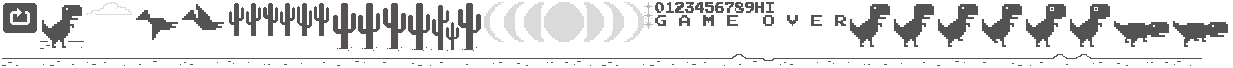
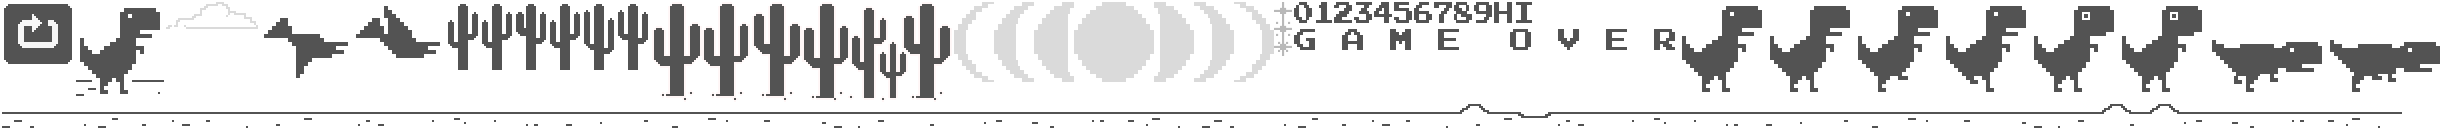
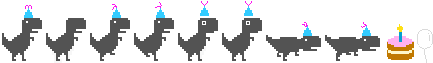
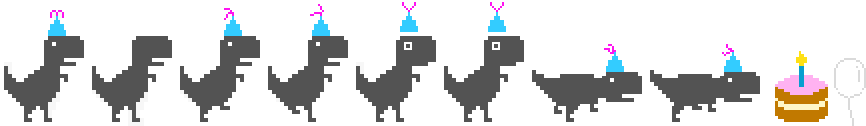

ERRding page...g  in 1  secondss
To resume in 4 minutes DONT INTERFERE!!!!


KeyboardInterrupt: 

In [2]:
count=0
while True:
    count=count+1
    print('MINING DATA NUMBER:',count)

    #options = Options()
    #options.add_argument('--headless')
    
    
    try:
        reload()
   
    except:   
        print('ERR')
        pass

    
    print('To resume in 4 minutes','DONT INTERFERE!!!!')
    countD(250)